## Visualization 
### Class Prediction Error

/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans

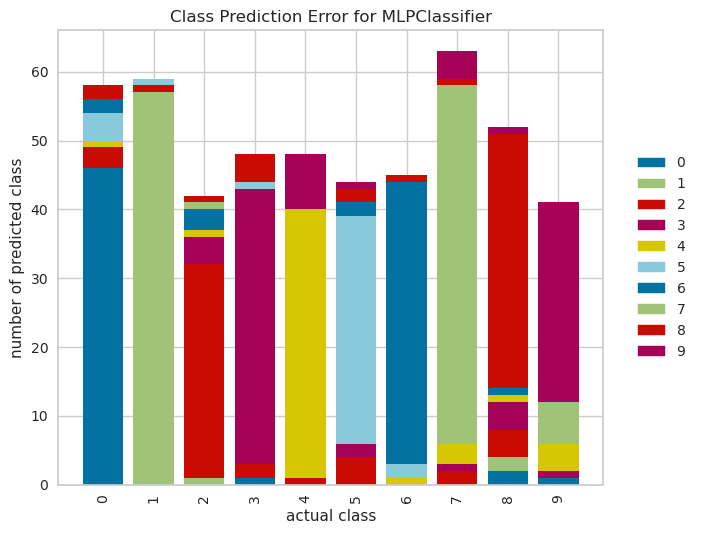

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)


# Load dataset
X, y = mnist.data, mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:2000],X[-500:],y[:2000],y[-500:]

# Train a Support Vector Machine classifier
classifier = MLPClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Instantiate the ClassPredictionError visualizer
visualizer = ClassPredictionError(classifier, classes=['0','1','2','3','4','5','6','7','8','9'])

# Fit the visualizer on the test data and scores
visualizer.score(X_test, y_test)

# Finalize and render the ClassPredictionError plot
visualizer.show()

plt.show()

### Scatter plot

### Plot multi-class SGD on the iris dataset¶

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

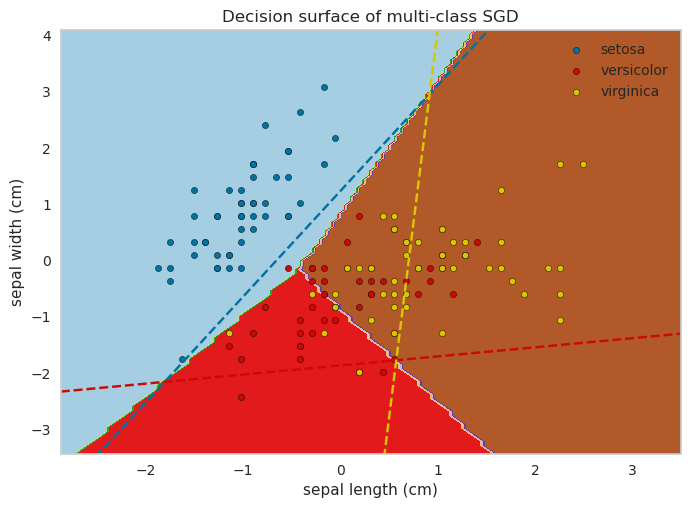

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

# standardize
scaler = StandardScaler()
X_trian_scaled= scaler.fit_transform(X_train)

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X_trian_scaled, y_train)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_trian_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

In [15]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def generate_dataset(n_rows, n_features):
    iris = load_iris()
    X, y = iris.data[:, :n_features], iris.target
    indices = np.random.choice(len(X), n_rows, replace=False)
    X_sampled, y_sampled = X[indices], y[indices]
    return X_sampled, y_sampled

# Parameters
num_rows_values = [50, 100, 150]
num_dimensions_values = [2, 3, 4]

for num_rows in num_rows_values:
    for num_dimensions in num_dimensions_values:
        # Generate dataset
        X, y = generate_dataset(num_rows, num_dimensions)

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train SVC model without scaling
        svc_model_no_scaling = SVC(random_state=42)
        svc_model_no_scaling.fit(X_train, y_train)

        # Evaluate the SVC model without scaling
        y_pred_no_scaling_svc = svc_model_no_scaling.predict(X_test)
        accuracy_no_scaling_svc = accuracy_score(y_test, y_pred_no_scaling_svc)

        # Train MLP model without scaling
        mlp_model_no_scaling = MLPClassifier(random_state=42)
        mlp_model_no_scaling.fit(X_train, y_train)

        # Evaluate the MLP model without scaling
        y_pred_no_scaling_mlp = mlp_model_no_scaling.predict(X_test)
        accuracy_no_scaling_mlp = accuracy_score(y_test, y_pred_no_scaling_mlp)

        # Create a pipeline for SVC with standard scaling
        svc_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svc', SVC(random_state=42))
        ])

        # Train SVC model with scaling using the pipeline
        svc_pipeline.fit(X_train, y_train)

        # Evaluate the SVC model with scaling
        y_pred_svc = svc_pipeline.predict(X_test)
        accuracy_svc = accuracy_score(y_test, y_pred_svc)


        # Create a pipeline for MLP with standard scaling
        mlp_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('mlp', MLPClassifier(random_state=42))
        ])

        # Train MLP model with scaling using the pipeline
        mlp_pipeline.fit(X_train, y_train)

        # Evaluate the MLP model with scaling
        y_pred_mlp = mlp_pipeline.predict(X_test)
        accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

        # Print results in a formatted way
        print(f"Dataset: rows={num_rows}, dimensions={num_dimensions}")
        print(f"SVC without scaling accuracy: {accuracy_no_scaling_svc:.2f}")
        print(f"MLP without scaling accuracy: {accuracy_no_scaling_mlp:.2f}")
        print(f"SVC with scaling accuracy: {accuracy_svc:.2f}")
        print(f"MLP with scaling accuracy: {accuracy_mlp:.2f}")
        print("=" * 40)


Dataset: rows=50, dimensions=2
SVC without scaling accuracy: 1.00
MLP without scaling accuracy: 0.90
SVC with scaling accuracy: 1.00
MLP with scaling accuracy: 1.00
Dataset: rows=50, dimensions=3
SVC without scaling accuracy: 1.00
MLP without scaling accuracy: 1.00
SVC with scaling accuracy: 0.90
MLP with scaling accuracy: 1.00
Dataset: rows=50, dimensions=4
SVC without scaling accuracy: 0.90
MLP without scaling accuracy: 1.00
SVC with scaling accuracy: 0.80
MLP with scaling accuracy: 0.60
Dataset: rows=100, dimensions=2
SVC without scaling accuracy: 0.75
MLP without scaling accuracy: 0.70
SVC with scaling accuracy: 0.70
MLP with scaling accuracy: 0.70
Dataset: rows=100, dimensions=3
SVC without scaling accuracy: 1.00
MLP without scaling accuracy: 1.00
SVC with scaling accuracy: 0.95
MLP with scaling accuracy: 0.90
Dataset: rows=100, dimensions=4
SVC without scaling accuracy: 1.00
MLP without scaling accuracy: 1.00
SVC with scaling accuracy: 1.00
MLP with scaling accuracy: 0.95
Dataset

In [14]:
model_path_svc_no_scaling

'svc_no_scaling_rows_150_dimensions_4.joblib'

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X_train = iris.data
y_train = iris.target

# Define a pipeline with SVC
svc_pipeline = make_pipeline(SVC(probability=True))

# Train the pipeline on the entire dataset
svc_pipeline.fit(X_train, y_train)

# Get class probabilities using the pipeline
probabilities_direct = svc_pipeline.predict_proba(X_train)

# Use cross_val_predict to get cross-validated class probabilities
probabilities_cv = cross_val_predict(SVC(probability=True), X_train, y_train, cv=3, method="predict_proba")

print("Direct Prediction Shape:", probabilities_direct)
print("Cross-Validated Prediction Shape:", probabilities_cv)


Direct Prediction Shape: (150, 3)
Cross-Validated Prediction Shape: (150, 3)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

# Create GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the grid search to the data
grid.fit(X, y)

# Access the best hyperparameter values
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

# Access the best model
best_model = grid.best_estimator_
print("Best Model:", best_model)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

In [11]:
import numpy as np
p = np.array([0.62111801, 0.33333333, 0.26666667, 0.13333333])
for n in p:
    print(n)

0.62111801
0.33333333
0.26666667
0.13333333
